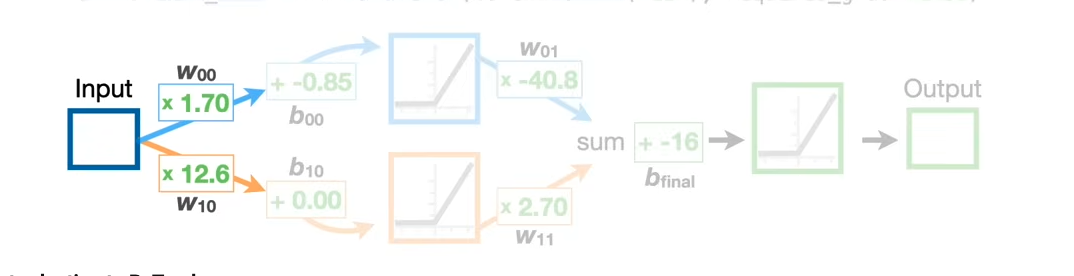

In [2]:
import torch #USed to create tensors to store the input data
import torch.nn as nn # USed to make biases and weights part of model
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns



Init creates and initialized the weights and biases, and then forward method actuall creates an output by using weights and biases.

In [7]:
#Creating a class of NN

class BasicNN(nn.Module):
    
    #initializing method
    def __init__(self):
        super().__init__()
        #Parameter will make it a parameter of the neural network which means
        #it can be optimized
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8),requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7),requires_grad=False)
        
        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)
        
        # After all the weights and biases, we need to connect input and activation functions
        # We need a forward pass 
        
    def forward(self, input):
        
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output =    top_relu_output * self.w01 
        
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu) 
        scaled_bottom_relu_output = bottom_relu_output * self.w11
        
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias   
        
        output = F.relu(input_to_final_relu)
        
        return output

        
        
        
        

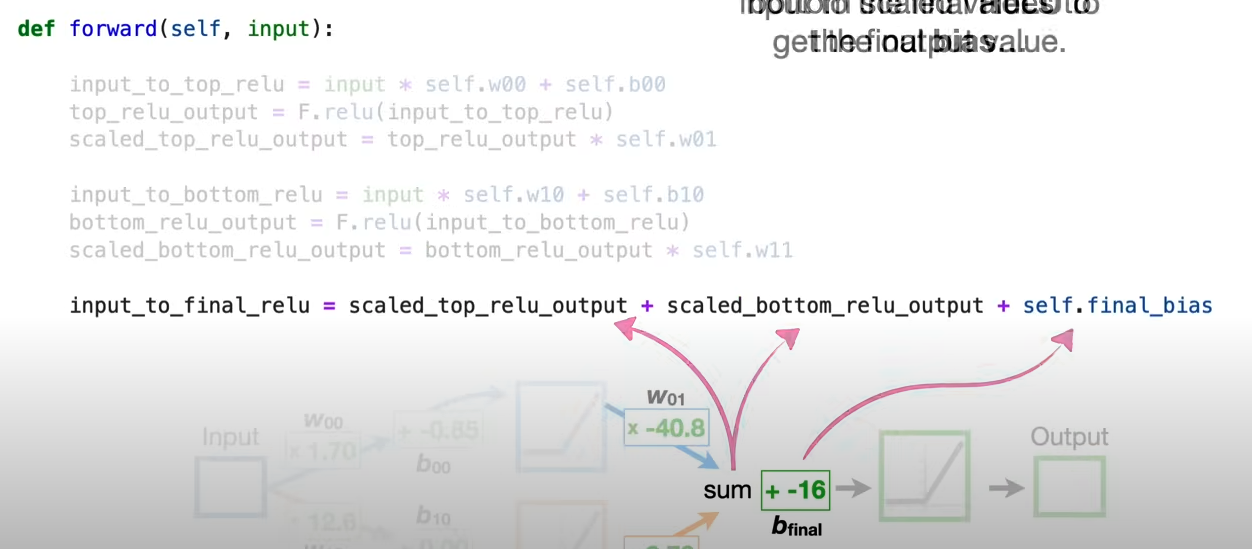

In [33]:
# Testing the class
# Creates an input tensor sequence with 11 values
input_doses = torch.linspace(start=0, end=1, steps=11)

# Create a model
model = BasicNN()
output_values = model(input_doses) 

In [34]:
output_values

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0100, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])

Text(0, 0.5, 'Dose')

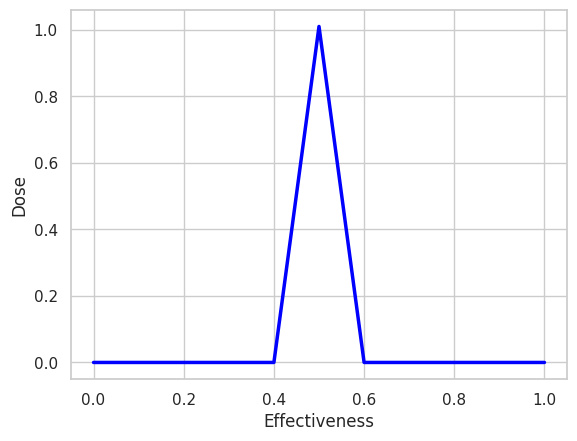

In [11]:
# Plotting results
sns.set(style="whitegrid")
sns.lineplot(x=input_doses,
             y=output_values,
             color = "blue",
             linewidth = 2.5
             )
plt.xlabel("Effectiveness")
plt.ylabel("Dose")

In [58]:
#Creating a class of NN_train

class BasicNN_train(nn.Module):
    
    #initializing method
    def __init__(self):
        super().__init__()
        #Parameter will make it a parameter of the neural network which means
        #it can be optimized
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8),requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7),requires_grad=False)
        
        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)
        
        # After all the weights and biases, we need to connect input and activation functions
        # We need a forward pass 
        
    def forward(self, input):
        
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output =    top_relu_output * self.w01 
        
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu) 
        scaled_bottom_relu_output = bottom_relu_output * self.w11
        
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias   
        
        output = F.relu(input_to_final_relu)
        
        return output

        
        
        
        

In [65]:
model = BasicNN_train()
output_values = model(input_doses)

Text(0, 0.5, 'Dose')

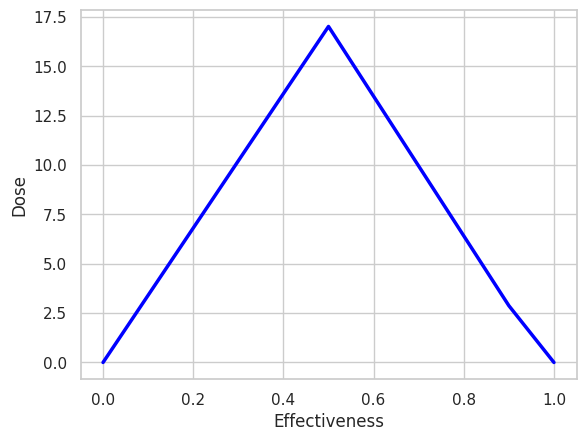

In [66]:
# Plotting results
sns.set(style="whitegrid")
sns.lineplot(x=input_doses,
             y=output_values.detach(),
             color = "blue",
             linewidth = 2.5
             )
plt.xlabel("Effectiveness")
plt.ylabel("Dose")

In [67]:
inputs = torch.tensor([0.,0.5,1.])
labels = torch.tensor([0.,1.0,0.])

In [68]:
def train(input,labels):
    
    optimizer = SGD(model.parameters(), lr=0.1)
    
    print("The final bias, before optimization:" + str(model.final_bias.data) + "\n")
    
    total_loss = 0 # The calculates total loss of the model after it sees all data
    for epoch in range(1000):
        for iteration in range(len(inputs)):
            
            input_i = inputs[iteration]
            label_i = labels[iteration]
            
            output_i = model(input_i)
            
            loss = (output_i - label_i)**2 # Mean squared error
            
            loss.backward() # This is used to calculate the derievate of loss function with b_final
            # loss.backward adds and accumulates the derivative through the loop
            
            total_loss += float(loss) # How well model fits to all of the data

        if(total_loss < 0.0001):
            # if the total loss is small, break loop, or iterate till all epochs
            print("Num steps:" + str(epoch))
            break
        
        optimizer.step() # if the loss is not small, the optimizer takes a step in the right direction
        # This is done using the derivatives stored in the model. and SGD has access to that.
        optimizer.zero_grad() # So we zero out the derivative, so that previous step dreviatives are removed.
        
        print("Step: " + str(epoch)+ " Final Bias: " + str(model.final_bias.data)+"\n")
    
    print("final bias, after optimization:"  + str(model.final_bias.data))    
    print("Total loss:"  + str(total_loss))



In [69]:
train(input, labels)

The final bias, before optimization:tensor(0.)

Step: 0 Final Bias: tensor(-3.2020)

Step: 1 Final Bias: tensor(-5.7636)

Step: 2 Final Bias: tensor(-7.8129)

Step: 3 Final Bias: tensor(-9.4523)

Step: 4 Final Bias: tensor(-10.7638)

Step: 5 Final Bias: tensor(-11.8131)

Step: 6 Final Bias: tensor(-12.6525)

Step: 7 Final Bias: tensor(-13.3240)

Step: 8 Final Bias: tensor(-13.8612)

Step: 9 Final Bias: tensor(-14.2909)

Step: 10 Final Bias: tensor(-14.6348)

Step: 11 Final Bias: tensor(-14.9098)

Step: 12 Final Bias: tensor(-15.1298)

Step: 13 Final Bias: tensor(-15.3059)

Step: 14 Final Bias: tensor(-15.4467)

Step: 15 Final Bias: tensor(-15.5594)

Step: 16 Final Bias: tensor(-15.6495)

Step: 17 Final Bias: tensor(-15.7216)

Step: 18 Final Bias: tensor(-15.7793)

Step: 19 Final Bias: tensor(-15.8254)

Step: 20 Final Bias: tensor(-15.8623)

Step: 21 Final Bias: tensor(-15.8919)

Step: 22 Final Bias: tensor(-15.9155)

Step: 23 Final Bias: tensor(-15.9344)

Step: 24 Final Bias: tensor(-1